In [1]:
# importing required Libraries

# importing NumPy for math
import numpy as np
# importing Pandas for DataFrame data structure
import pandas as pd
# importing Matplotlib for graphs
import matplotlib.pyplot as plt
# importing Seaborn for BETTER graphs
import seaborn as sns
# importing SciPy.Stats for STATISTICS
import scipy.stats as stats

In [2]:
# importing the data sets into separate dataframes

df_cab = pd.read_csv('Cab_Data.csv')
df_city = pd.read_csv('City.csv')
df_cust = pd.read_csv('Customer_ID.csv')
df_txn = pd.read_csv('Transaction_ID.csv')

In [3]:
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction ID  1998 non-null   int64  
 1   Date of Travel  1998 non-null   int64  
 2   Company         1998 non-null   object 
 3   City            1998 non-null   object 
 4   KM Travelled    1998 non-null   float64
 5   Price Charged   1998 non-null   float64
 6   Cost of Trip    1998 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 109.4+ KB


In [4]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [5]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
df_txn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Transaction ID  1999 non-null   int64 
 1   Customer ID     1999 non-null   int64 
 2   Payment_Mode    1999 non-null   object
dtypes: int64(2), object(1)
memory usage: 47.0+ KB


In [7]:
df_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [8]:
df_city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [9]:
df_cust.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [10]:
df_txn.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [11]:
# Checking the proportion of Male Customers to Female Customers

df_cust['Gender'].value_counts(), df_cust['Gender'].value_counts()/len(df_cust) * 100

(Male      26562
 Female    22609
 Name: Gender, dtype: int64,
 Male      54.019646
 Female    45.980354
 Name: Gender, dtype: float64)

In [12]:
# Checking the distribution of Payment Modes

df_txn['Payment_Mode'].value_counts(), df_txn['Payment_Mode'].value_counts()/len(df_txn) * 100

(Card    1164
 Cash     835
 Name: Payment_Mode, dtype: int64,
 Card    58.229115
 Cash    41.770885
 Name: Payment_Mode, dtype: float64)

In [13]:
# yoinking a new library oh boy oh boy!

# !pip install xlrd

In [14]:
# converting the 'Date of Travel' column to datetime format

import xlrd 

# creating a custom function that will convert excel serial numbers to dates

def excel_to_normal_fucking_date(xl_date):

    # Calling the xldate_as_datetime() function to 
    # convert the specified excel serial date into 
    # datetime.datetime object 
    datetime_date = xlrd.xldate_as_datetime(xl_date, 0) 

    # Calling the datetime_date.date() function to convert 
    # the above returned datetime.datetime object into 
    # datetime.date object 
    date_object = datetime_date.date() 

    # Calling the isoformat() function to convert the 
    # above returned datetime.date object into the 
    # ISO format date string 
    string_date = date_object.isoformat() 

    # Returning the converted date string 
    # return string_date
    return date_object

In [15]:
df_cab['Date of Travel'] = df_cab['Date of Travel'].apply(excel_to_normal_fucking_date)
df_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [16]:
# Finding profit of each trip
df_cab['Profit per Trip'] = df_cab['Price Charged'] - df_cab['Cost of Trip']

# Finding Charge per Distance
df_cab['Charge per Distance'] = df_cab['Price Charged']/df_cab['KM Travelled']

# Separating the data of each company:
df_yellow = df_cab[df_cab['Company'] == 'Yellow Cab']
df_pink = df_cab[df_cab['Company'] == 'Pink Cab']

Total profit of Yellow Cab is $ 378956.3736
Total profit of Pink Cab is $ 43626.502


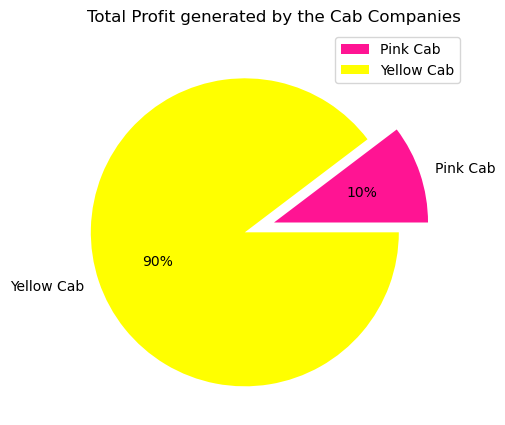

In [17]:
# 1) Check profit of each cab company

print('Total profit of Yellow Cab is $', df_yellow['Profit per Trip'].sum())
print('Total profit of Pink Cab is $', df_pink['Profit per Trip'].sum())
plt.figure(figsize=(5,5))
total_profit = df_cab.groupby('Company')['Profit per Trip'].sum().to_frame()
ax = plt.pie(x=total_profit['Profit per Trip'],explode=[0,0.2],autopct='%.0f%%',labels=['Pink Cab','Yellow Cab'],colors=['deeppink','yellow'])
plt.title('Total Profit generated by the Cab Companies')
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel(ylabel='')
plt.show()

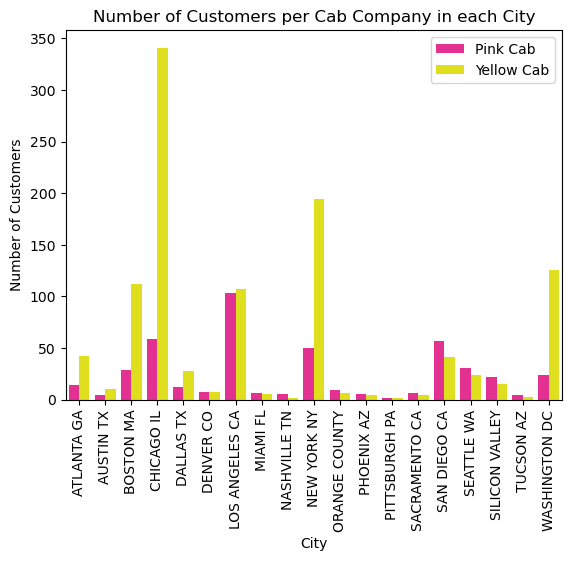

In [18]:
#2) Check the total number of each cab company's customers
# per city (Multi-Bar Plot))

no_of_cust_per_city = df_cab.merge(df_txn,how='inner').groupby(['City','Company'])['Customer ID'].nunique().to_frame().reset_index()
no_of_cust_per_city

ax = sns.barplot(data = no_of_cust_per_city, x='City', y='Customer ID', hue ='Company', palette={"Yellow Cab": "yellow", "Pink Cab": "deeppink"} )
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(bbox_to_anchor = (1,1))
plt.ylabel('Number of Customers')
plt.title('Number of Customers per Cab Company in each City')
plt.show()

            Number of Customers
Company                        
Pink Cab                    449
Yellow Cab                 1073


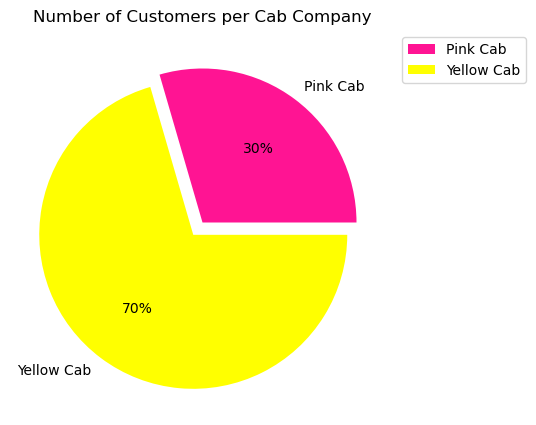

In [19]:
# 3) Check the distribution of customers in each cab company (Pie Chart)

no_of_cust = df_cab.merge(df_txn,how='inner').groupby(['Company'])['Customer ID'].nunique().to_frame()
no_of_cust = no_of_cust.rename(columns={'Customer ID': 'Number of Customers'})
print(no_of_cust)
plt.figure(figsize=(5,5))
plt.pie(x=no_of_cust['Number of Customers'],explode=[0,0.1],autopct='%.0f%%',labels=['Pink Cab','Yellow Cab'],colors=['deeppink','yellow'])
plt.legend(bbox_to_anchor=(1,1))
plt.title('Number of Customers per Cab Company')
plt.ylabel(ylabel='')
plt.show()

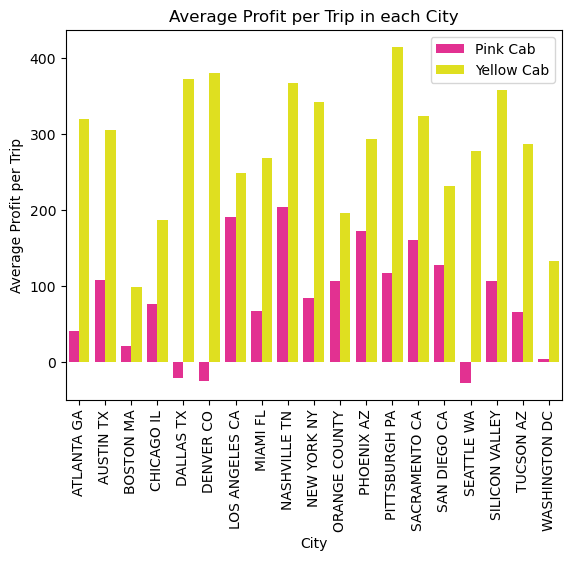

In [20]:
# 4) Check the city-wise profit and Charge/Distance

city_wise_profit = df_cab.groupby(['City','Company'])['Profit per Trip'].mean().to_frame()
city_wise_profit.reset_index(inplace=True)

ax = sns.barplot(data = city_wise_profit, x='City', y='Profit per Trip', hue ='Company', palette={"Yellow Cab": "yellow", "Pink Cab": "deeppink"})
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(bbox_to_anchor = (1,1))
plt.ylabel('Average Profit per Trip')
plt.title('Average Profit per Trip in each City')
plt.show()

In [21]:
# 5) Check the company-wise profit and Charge/Distance

print('Mean profit of Yellow Cab is', df_yellow['Profit per Trip'].mean())
# print('Median profit of Yellow Cab is', df_yellow['Profit per Trip'].median())

print('Mean profit of Pink Cab is', df_pink['Profit per Trip'].mean())
# print('Median profit of Pink Cab is', df_pink['Profit per Trip'].median())
      
print('The Average Fare per km of Yellow Cab is', df_yellow['Charge per Distance'].mean())
print('The Average Fare per km of Pink Cab is', df_pink['Charge per Distance'].mean())

Mean profit of Yellow Cab is 245.4380658031088
Mean profit of Pink Cab is 96.09361674008811
The Average Fare per km of Yellow Cab is 23.830954947749355
The Average Fare per km of Pink Cab is 15.0401628419246


            Number of High Income Customers
Company                                    
Pink Cab                                122
Yellow Cab                              257


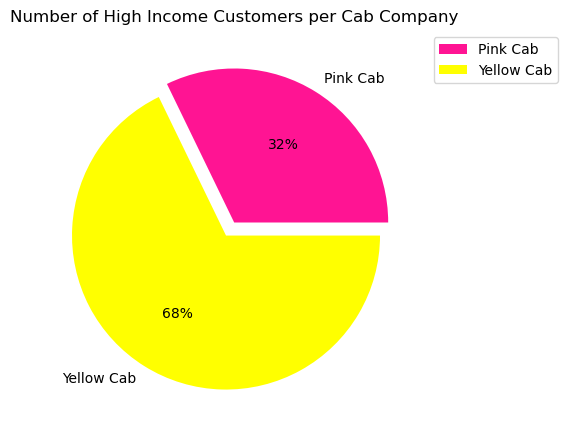

In [22]:
# 6) Check which company has more high-income customers, who are more likely to use cab than public transport

high_income_cust = df_cust.merge(df_txn,how='inner').merge(df_cab,how='inner')
high_income_cust = high_income_cust[high_income_cust['Income (USD/Month)'] > high_income_cust['Income (USD/Month)'].quantile(0.75)]
high_income_cust = high_income_cust.groupby('Company')['Customer ID'].nunique().to_frame()
high_income_cust = high_income_cust.rename(columns={'Customer ID': 'Number of High Income Customers'})
print(high_income_cust)
plt.figure(figsize=(5,5))
plt.pie(x=high_income_cust['Number of High Income Customers'],explode=[0,0.1],autopct='%.0f%%',labels=['Pink Cab','Yellow Cab'],colors=['deeppink','yellow'])
plt.legend(bbox_to_anchor=(1,1))
plt.title('Number of High Income Customers per Cab Company')
plt.ylabel(ylabel='')
plt.show()

Number of Active Customers is 1509
Number of Inactive Customers is 47662


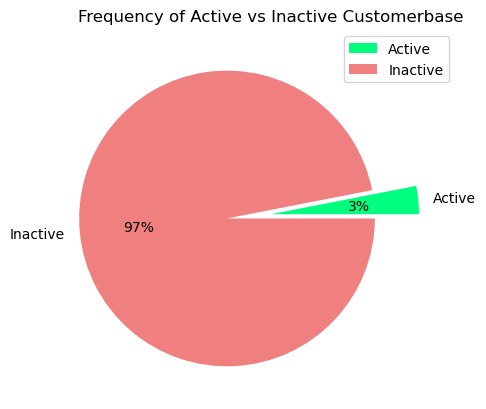

In [23]:
# 7) Find out why there is a disparity between the number of customers and the number of transactions, i.e., which customers are not transacting.

no_of_inactive_customers = high_income_cust = df_cust.merge(df_txn,how='left').merge(df_cab,how='left')
inactive = no_of_inactive_customers[no_of_inactive_customers['Price Charged'].isnull()]['Customer ID'].nunique()
active = no_of_inactive_customers['Customer ID'].nunique() - inactive
print('Number of Active Customers is',active)
print('Number of Inactive Customers is',inactive)
no_of_inactive_customers = pd.DataFrame(no_of_inactive_customers)
plt.pie([active,inactive],explode=[0,0.3],autopct='%.0f%%',labels=['Active','Inactive'],colors=['springgreen','lightcoral'])
plt.legend(bbox_to_anchor=(1,1))
plt.title('Frequency of Active vs Inactive Customerbase')
plt.ylabel(ylabel='')
plt.show()

C:\Users\Galahad38\AppData\Local\Temp\ipykernel_17152\324522282.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


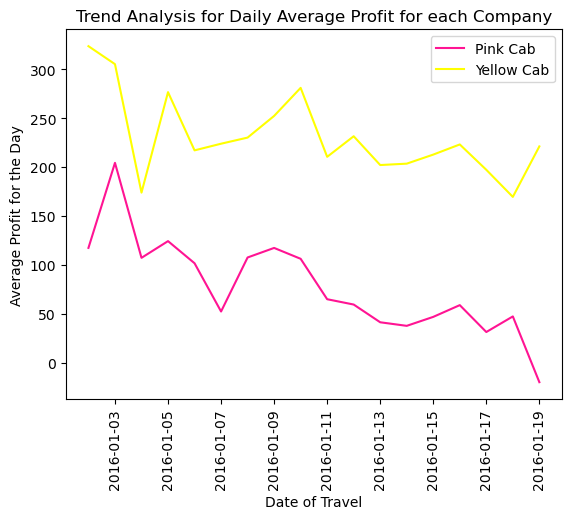

In [24]:
# 8) Trend Analysis of day-wise Total profit for each Company 

day_wise_profit = df_cab.groupby(['Date of Travel','Company'])['Profit per Trip'].mean().to_frame()
day_wise_profit.reset_index(inplace=True)

ax = sns.lineplot(data = day_wise_profit, x='Date of Travel', y='Profit per Trip', hue ='Company', palette={"Yellow Cab": "yellow", "Pink Cab": "deeppink"})
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(bbox_to_anchor = (1,1))
plt.ylabel('Average Profit for the Day')
plt.title('Trend Analysis for Daily Average Profit for each Company')
plt.show()

C:\Users\Galahad38\AppData\Local\Temp\ipykernel_17152\1018379703.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


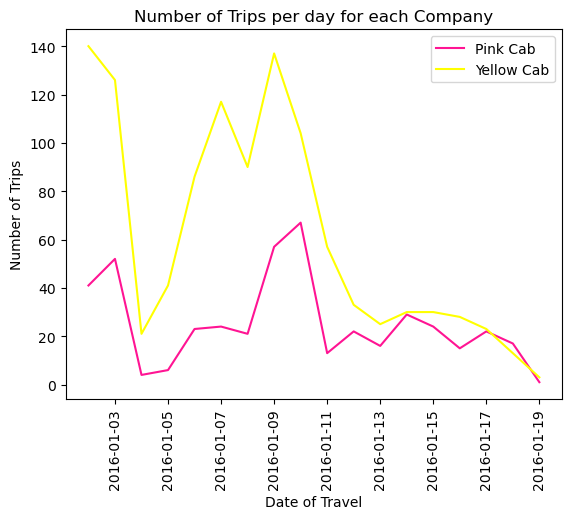

In [25]:
# 9) Trend Analysis of total Daily Trips for each Company 

day_wise_trips = df_cab.merge(df_txn,how='inner').groupby(['Date of Travel','Company'])['Transaction ID'].nunique().to_frame().reset_index()

ax = sns.lineplot(data = day_wise_trips, x='Date of Travel', y='Transaction ID', hue ='Company', palette={"Yellow Cab": "yellow", "Pink Cab": "deeppink"} )
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(bbox_to_anchor = (1,1))
plt.ylabel('Number of Trips')
plt.title('Number of Trips per day for each Company')
plt.show()

# Hypothesis Testing

In [26]:
# Step 1: Check the Assumptions:
# Data is Normal (Not true, but we will assume so)
# Population Standard Deviation is not known
# n < 30 (Not true, but from 7) we can understand that this sample size is nowhere near close to the population size)
# Let us perform 2-sample independent t-test

In [27]:
# Step 2: Formation of Hypothesis:

# Our Claim is that the Daily Average Profit of Yellow Cab company throughout its operations is greater than
# the Daily Average Profit of Pink Cab company throughout its operations.

# Null Hypothesis (H0): mu_y <= mu_p
# Alternate Hypothesis (H1): mu_y > mu_p

In [28]:
# Step 3: Directionality of the Test:
# Since the Null Hypothesis can be rejected in only one direction (Right Direction), let us perform Right-Tail test.

In [29]:
# Step 4: Calculation of the Test Statistic (test_stat):

test_stat, p_val = stats.ttest_ind(df_yellow.groupby('Date of Travel')['Profit per Trip'].mean(),df_pink.groupby('Date of Travel')['Profit per Trip'].mean(),alternative='greater')
test_stat, p_val

(9.920310930201195, 7.156227822218404e-12)

In [30]:
# P-Value Approach:

CL = 0.99
SL = 0.01
p_val < SL

True

In [31]:
# Concluding the Hypothesis:

if p_val < SL:
    print('Since the P-Value is less than the Significance Level,\nWe reject the Null Hypothesis.')
else:
    print('Since the P-Value is not less than the Significance Level,\nWe fail to reject the Null Hypothesis.')

Since the P-Value is less than the Significance Level,
We reject the Null Hypothesis.


In [32]:
# We reject the Null Hypothesis, concluding that the Daily Average Profit of Yellow Cab company throughout its operations is greater than
# the Daily Average Profit of Pink Cab company throughout its operations.

In [33]:
# Since Yellow Cab Company is more profitable, we think it's a better investment.